## Before normalization

<IPython.core.display.Javascript object>


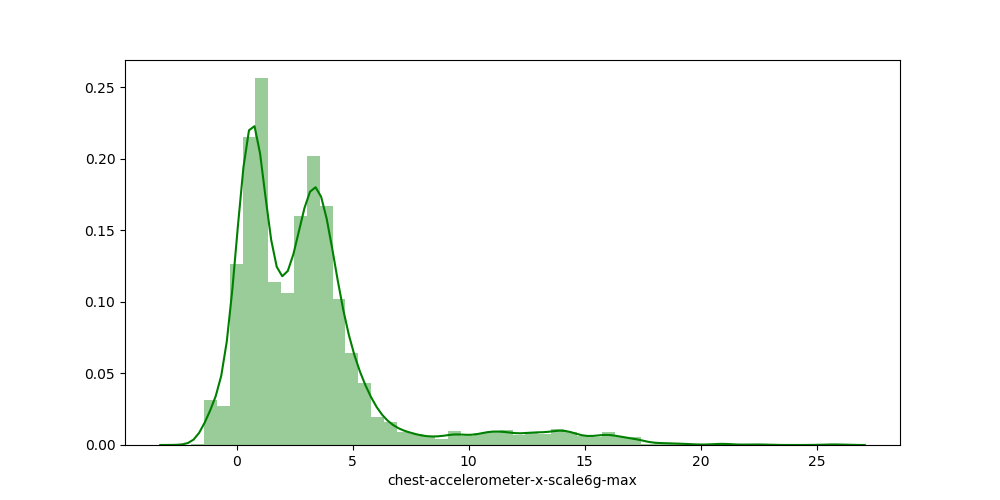

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib notebook

df=pd.read_csv('/home/kishore/Datasets/PAMAP2_Dataset/cleaned/new/feature8.csv')
plt.figure(figsize=(10,5))
c= 'chest-accelerometer-x-scale6g-max'
sns.distplot(df[c],color='green')
plt.show()

### define a function that normalizes a person-csv 

In [6]:
def normalize(df):
    l=df.shape[1]
    a=pd.DataFrame({'none': []})
    for i in range(0,l):
        data=( 2*( df.iloc[:,i] - df.iloc[:,i].min() )/ ( df.iloc[:,i].max()-df.iloc[:,i].min() )  ) -1
        a=pd.concat([a,data],axis=1)

    return a.drop(columns=['none'])

In [ ]:
sub=df['subject'].tolist()

act =df['activityID'].tolist() 

dfn=df.drop(columns=['activityID','subject'])
ds=normalize(dfn)
ds.insert(loc=0, column='activityID', value=act)
ds.insert(loc=385, column='subject', value=sub)
ds.to_csv(r'/home/kishore/Datasets/PAMAP2_Dataset/cleaned/new/feature8N.csv',index=None,header=True)

## after normalization

<IPython.core.display.Javascript object>


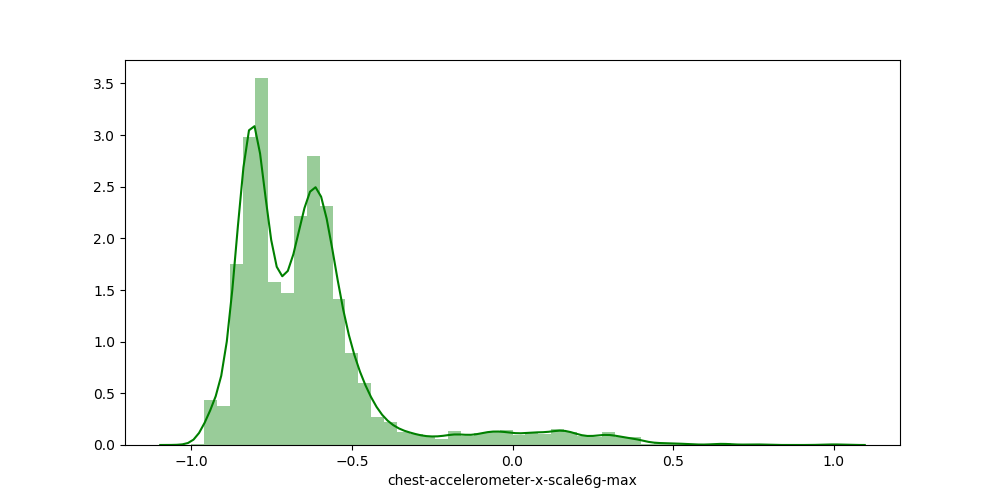

In [8]:
df=pd.read_csv('/home/kishore/Datasets/PAMAP2_Dataset/cleaned/new/feature8N.csv')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
plt.figure(figsize=(10,5))
sns.distplot(df[c],color='green')
plt.show()
